# Варіант 3

In [4]:
#1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

In [5]:
# 1. Виведіть перші 8 рядків набору даних.
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [8]:
# 2. Вивести останні 8 рядків набору даних.
print(df.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [11]:
# 4. Отримайте загальну інформацію про дані у наборі даних.
print(df[['Id', 'Year', 'Count']].describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [12]:
# 5. Знайдіть кількість унікальних імен у наборі даних
unique_names_count = df['Name'].nunique()
print("Number of unique names:", unique_names_count)

Number of unique names: 93889


In [14]:
#6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних 
unique_names_gender = df.groupby('Gender')['Name'].nunique()

print("Number of unique male names:", unique_names_gender['M'])
print("Number of unique female names:", unique_names_gender['F'])

Number of unique male names: 39199
Number of unique female names: 64911


In [15]:
# 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

males_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)]
popular_male_names_2010 = males_2010.groupby('Name')['Count'].sum().reset_index()
popular_male_names_2010 = popular_male_names_2010.sort_values(by='Count', ascending=False)
top_5_male_names_2010 = popular_male_names_2010.head(5)

print("5 most popular male names in 2010:")
print(top_5_male_names_2010)

5 most popular male names in 2010:
          Name  Count
5610     Jacob  22082
4359     Ethan  17985
9563   Michael  17308
6296    Jayden  17152
13498  William  17030


In [17]:
# 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
popular_names_yearly = df.groupby(['Name', 'Year'])['Count'].sum().reset_index()
year = 1947 
most_popular_name_year = popular_names_yearly[popular_names_yearly['Year'] == year]
most_popular_name_year = most_popular_name_year.loc[most_popular_name_year['Count'].idxmax()]

print(f"The most popular name in {year} is '{most_popular_name_year['Name']}' with {most_popular_name_year['Count']} occurrences.")

The most popular name in 1947 is 'Linda' with 99895 occurrences.


In [19]:
# 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
print("Number of records with the minimum count:", min_count_records)

Number of records with the minimum count: 254615


In [20]:
# 10. Підрахуйте кількість унікальних імен у кожному році
unique_names_by_year = df.groupby('Year')['Name'].nunique()

print("Number of unique names in each year:")
print(unique_names_by_year)

Number of unique names in each year:
Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [21]:
# 11. Знайдіть рік із найбільшою кількістю унікальних імен.
year_with_most_unique_names = unique_names_by_year.idxmax()
print("Year with the most unique names:", year_with_most_unique_names)

Year with the most unique names: 2008


In [24]:
# Filter the dataset for the year 2008
df_2008 = df[df['Year'] == 2008]

# Group by name and sum the counts
popular_names_2008 = df_2008.groupby('Name')['Count'].sum().reset_index()

# Find the most popular name in 2008
most_popular_name_2008 = popular_names_2008.loc[popular_names_2008['Count'].idxmax()]

print("The most popular name in 2008 is '{}' with {} occurrences.".format(most_popular_name_2008['Name'], most_popular_name_2008['Count']))

The most popular name in 2008 is 'Jacob' with 22597 occurrences.


In [26]:
# 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
gender_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
more_girls_than_boys = (gender_counts['F'] > gender_counts['M']).sum()
print("Number of years when more girls were born than boys:", more_girls_than_boys)


Number of years when more girls were born than boys: 54


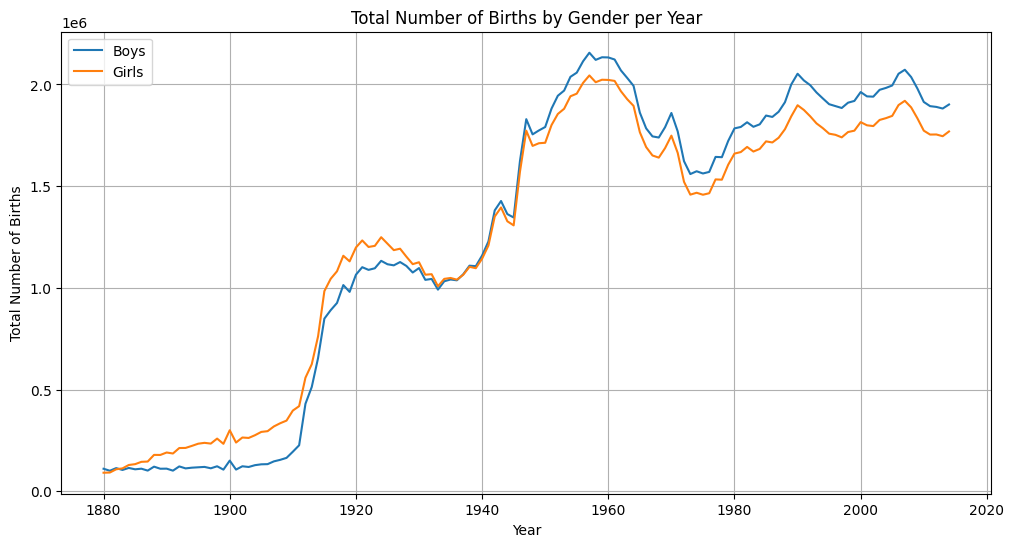

In [28]:
# 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.
gender_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
plt.figure(figsize=(12, 6))
plt.plot(gender_counts.index, gender_counts['M'], label='Boys')
plt.plot(gender_counts.index, gender_counts['F'], label='Girls')
plt.xlabel('Year')
plt.ylabel('Total Number of Births')
plt.title('Total Number of Births by Gender per Year')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# 20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)
name_genders = df.groupby('Name')['Gender'].nunique()
gender_neutral_names_count = (name_genders == 2).sum()
print("Number of gender-neutral names:", gender_neutral_names_count)

Number of gender-neutral names: 10221


In [31]:
# 21. Порахуйте, скільки разів хлопчиків називали Barbara
boys_named_barbara = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print("Number of times boys were named Barbara:", boys_named_barbara)

Number of times boys were named Barbara: 4139


In [36]:
# 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)
name_genders = df.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
gender_neutral_names_per_year = name_genders[name_genders['Gender'] == 2].groupby('Year')['Name'].unique()
intersection_gender_neutral_names = set(gender_neutral_names_per_year.values[0]).intersection(*gender_neutral_names_per_year.values[1:])

print("Most popular gender-neutral names:")
for name in intersection_gender_neutral_names:
    print(name)

Most popular gender-neutral names:
Marion
Jessie
Jesse
Tommie
Joseph
Robert
John
Jean
William
Francis
James
Johnnie
Lee
Leslie
Sidney
Ollie


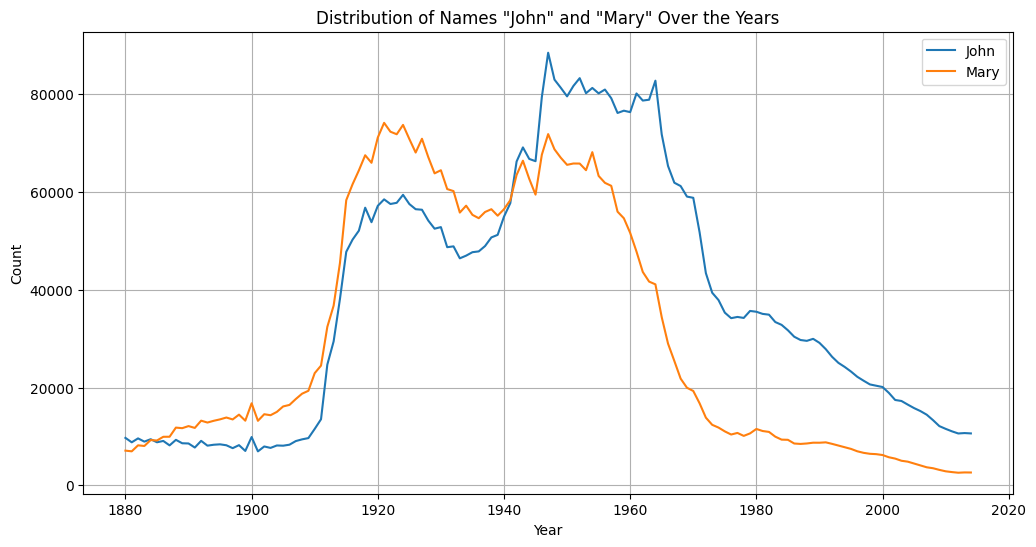

In [37]:
# 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

john_data = df[df['Name'] == 'John']
mary_data = df[df['Name'] == 'Mary']
john_counts = john_data.groupby('Year')['Count'].sum()
mary_counts = mary_data.groupby('Year')['Count'].sum()
plt.figure(figsize=(12, 6))
plt.plot(john_counts.index, john_counts.values, label='John')
plt.plot(mary_counts.index, mary_counts.values, label='Mary')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Names "John" and "Mary" Over the Years')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# 27. Знайти найпопулярніші імена в кожному році.
most_popular_names_per_year = df.loc[df.groupby('Year')['Count'].idxmax()]
print("Most popular names in each year:")
print(most_popular_names_per_year[['Year', 'Name', 'Count']])

Most popular names in each year:
         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
